Coupled vegetation-atmosphere system with external forcing PDO
Predicting percipitation changes for the next 50 years

Main functions I'll be using: 

dV/dt = (V*P)-V/(tv)

P = max[P1 + mu*V + F(t), 0]


In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import random # note- this isnt the best way to get randomness
import math

t = 50 #years 

def runModel(function, xlabel, ylabel, title) -> list:
    y = np.zeros(t)
    for i in range (0, t):
        y[i] = function(i)

    plt.plot(np.arange(0, t, 1), y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 
    plt.title(title)
    plt.show()
    return y


Modeling the Pacific Decedal Oscillation

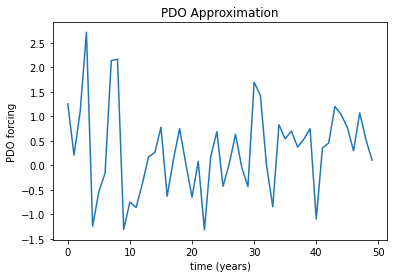

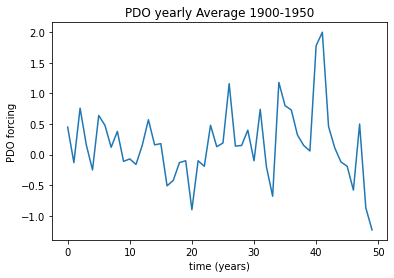

In [6]:

def PDO(i):
    return np.random.normal(.25, 1)*(math.sin((random.random()*i) + random.uniform(0, 2))) + random.uniform(0, i/50) 
    # first random affects amplitude, second random affects duration of period, third random affects offset of period
    # that last random.uniform(0, i/50) accounts for climate change; favors el nino 

#plot the PDO by itself to see the forcing
pdo = runModel(PDO, "time (years)", "PDO forcing", "PDO Approximation")

#read PDO data from NOAA to show how my approximation compares
# **make sure time scale matches!! 

#this data is from http://research.jisao.washington.edu/pdo/PDO.latest 
#since this data is per month, I took yearly average of PDO force
Noaa_pdo_data = [.45, -0.13, .76, 0.16, -.25, .64, .48, .12, .38, -0.11, -0.07, -0.16, .15, .57, .16, .18, -0.51, -0.42, -0.13, -0.1, -0.9, -0.1, -0.19, .48, .13, .19, 1.16, .14, .15, .4, -0.1, .74, -0.2, -0.68, 1.18, .8, .73, .32, .15, .06, 1.78, 2, .46, .11, -0.12, -0.19, -0.58, .5, -0.87, -1.23, -1.81]

def NOAA(i):
    return Noaa_pdo_data[i]

noaa_pdo = runModel(NOAA, "time (years)", "PDO forcing", "PDO yearly Average 1900-1950")


coupled precipitation / vegetation 

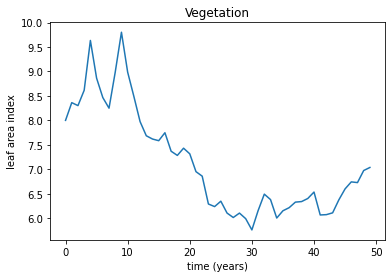

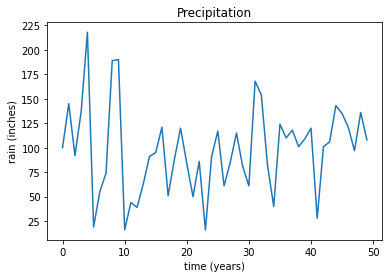

In [8]:

#   constants   #

# vegetation (normalized leaf area index from 0 to 1)

# mu is linearization coef, represents models sensitivity to vegetation change
mu = .2 #low because pnw weather is mostly reliant on things like PDO 
#tau of v is vegetation growth or loss timescale
tv = 10 # decade
#atmospheric response time 
tp = 12 #a month
#time

geog = .8
#geog is positive because pnw is located in a convergence zone
# precipitation (inches per year)

def Precipitation(i, p, v): 
    ans = geog + mu*(1/v) + pdo[i]/2 
    if ans > 0:
        return ans
    else:
        return 0 #cant have negative rainfall

def Vegetation(v, p):
    return  ((v*p - v) / tv) + v


veg = np.zeros(t)
precip = np.zeros(t)

#initialize
V = 8.0 #high because olympic mountains are a rainforest
P = 1

for i in range(t):
    ###########
    veg[i] = V
    precip[i] = P
    #############
    P = Precipitation(i, P, V)
    V = Vegetation(V, P)
    
    

plt.plot(np.arange(0, t, 1), veg)
plt.ylabel("leaf area index")
plt.xlabel("time (years)")
plt.title("Vegetation")
plt.show()

#change precipitation to inches
for i in range(t):
    precip[i] = int(precip[i]*100)

plt.plot(np.arange(0, t, 1), precip)
plt.xlabel("time (years)")
plt.ylabel("rain (inches)") 
plt.title("Precipitation")
plt.show()



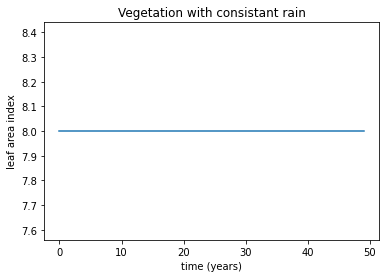

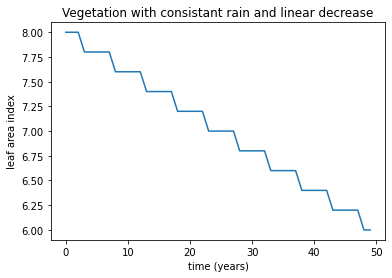

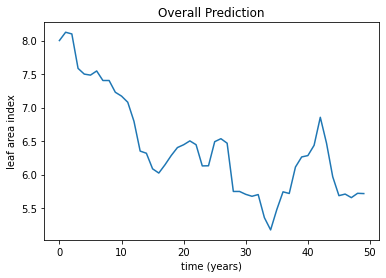

In [201]:
V = 8
P = 1 #keep contant

for i in range(t):
    veg[i] = V
    V = Vegetation(V, P)
    

plt.plot(np.arange(0, t, 1), veg)
plt.ylabel("leaf area index")
plt.xlabel("time (years)")
plt.title("Vegetation with consistant rain")
plt.show()
#this isnt thrilling but its a nice sanity check

#we can simulate vegetation loss due to urbanization 
veg = np.zeros(t)

for i in range(t):
    veg[i] = V
    V = Vegetation(V, P)
    if (i%5 == 2):
        V -= .2

plt.plot(np.arange(0, t, 1), veg)
plt.ylabel("leaf area index")
plt.xlabel("time (years)")
plt.title("Vegetation with consistant rain and linear decrease")
plt.show()

# OVERALL PREDICTION
# accounts for stochastic forcing (the PDO), linear decrease in vegetation 
# due to urbanization, feedbacks with percipitation
V = 8
P
for i in range(t):
    veg[i] = V
    precip[i] = P
    P = Precipitation(i, P, V)
    V = Vegetation(V, P)
    if (i%5 == 2):
        V -= .2
    
plt.plot(np.arange(0, t, 1), veg)
plt.ylabel("leaf area index")
plt.xlabel("time (years)")
plt.title("Overall Prediction")
plt.show()   
    


In conclusion, it seems that the Olympic Mountains Rainforest may become less of a rainforest. Even without the urbanization aspect, the leaf area index decreases over 50 years.

Citations:

https://www2.atmos.umd.edu/~zeng/papers/Zeng02_savanna2.pdf       
http://research.jisao.washington.edu/pdo/PDO.latest 